In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from torch.utils.data import DataLoader
from torchsummary import summary
from IPython.core.debugger import set_trace

from Tools import Trainer

## Loading datasets

In [2]:
from Tools.Dataloader import datasets_loader
train_loader, valid_loader, test_loader = datasets_loader()

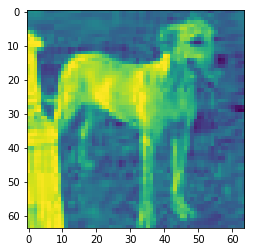

In [3]:
imgs, steering_angle = next(iter(test_loader))
im = imgs[1].numpy()[0]
# print(imgs[0].numpy()[)
plt.imshow(im)
# im2display = im.transpose((1,2,0))
# print(im2display.shape)
# plt.imshow(im2display, interpolation='nearest')
plt.show()

<class 'torch.Tensor'>
(3, 64, 64)


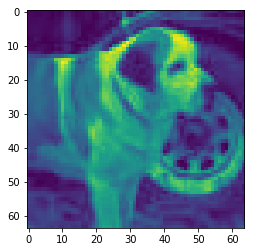

In [4]:
imgs, steering_angle = next(iter(train_loader))
print(type(imgs))
print(imgs[0].numpy().shape)
im = imgs[0].numpy()[0]
plt.imshow(im)
# im2display = im.transpose((1,2,0))
# print(im2display.shape)
# plt.imshow(im2display, interpolation='nearest')
plt.show()

In [5]:
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
plt.ion()

class DriveData(Dataset):
    __xs = []
    __ys = []

    def __init__(self, folder_dataset, transform=None):
        self.transform = transform
        # Open and load text file including the whole training data
        
        for i in range(1,5000):
            address = folder_dataset + (str(i)+".jpg")
            self.__xs.append(address)

    # Override to give PyTorch access to any image on the dataset
    def __getitem__(self, index):
        img = Image.open(self.__xs[index])
        img = img.convert('RGB')
        # Adding 
        if self.transform is not None:
            img = self.transform(img)
        else: 
            img = np.transpose(np.asarray(img), (2, 0,1))
            
        # Convert image and label to torch tensors
        img = torch.from_numpy(np.asarray(img))
        
        return img, 0

    # Override to give PyTorch size of dataset
    def __len__(self):
        return len(self.__xs)

In [8]:
nomr_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                torchvision.transforms.Normalize((0.4895832, 0.4546405, 0.41594946), 
                                                        (0.2520022, 0.24522494, 0.24728711))] )

transforms = torchvision.transforms.Compose([
    torchvision.transforms.FiveCrop(64), # this is a list of PIL Images
    torchvision.transforms.Lambda(lambda crops: torch.stack([nomr_transforms(crop) for crop in crops])), # returns a 4D tensor
])
   
dset_train = DriveData("./data/testset/test/", transforms )
test_loader2 = DataLoader(dset_train, batch_size=1, shuffle=False, num_workers=1)

1
(1, 5, 3, 64, 64)


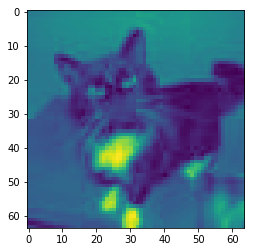

In [9]:
imgs, steering_angle = next(iter(test_loader2))
print(len(imgs))
print(imgs.numpy().shape)
im = imgs[0,1].numpy()[0]
# print(imgs[0].numpy()[)
plt.imshow(im)
# im2display = im.transpose((1,2,0))
# print(im2display.shape)
# plt.imshow(im2display, interpolation='nearest')
plt.show()

In [14]:
# from Classifier.XavierCNN import SimpleNN

model = torch.load("./Experiments/Xavier-Dropout-25-0.1-0.2")

if torch.cuda.is_available():
    model = model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

In [18]:
input, target = next(iter(test_loader2)) # input is a 5d tensor, target is 2d
if torch.cuda.is_available():
    input, target = input.cuda(), target.cuda()
bs, ncrops, c, h, w = input.size()
result = model(input.view(-1, c, h, w)) # fuse batch size and ncrops
result_avg = result.view(bs, ncrops, -1).mean(1) # avg over crops
print(result_avg)

tensor([[ 0.1060, -0.1130]], device='cuda:0', grad_fn=<MeanBackward0>)


## Hyper-parameters

In [11]:
hyperparams = {'num_epochs': 0,
               'lr0' :0.1, 
               'dropout':0.2,
               'save_checkpoint': False
                  }
cuda_available = torch.cuda.is_available()

## Creating the model

In [13]:
summary(model, (1, 28*28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]         392,500
            Linear-2               [-1, 1, 600]         300,600
            Linear-3                [-1, 1, 10]           6,010
Total params: 699,110
Trainable params: 699,110
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.67
Estimated Total Size (MB): 2.68
----------------------------------------------------------------


## Training 

In [14]:
# from Tools.Trainer import Trainer

# trainer = Trainer(model, optimizer, criterion, train_loader, valid_loader, test_loader, hyperparams)
# nll_train, nll_valid, acc_train, acc_valid =  trainer.train_model()
# print('Done...')

## Visualization

### accuracy and loss plots

In [15]:
import Tools.Visualization as V
V.plots(nll_train, nll_valid, acc_train, acc_valid)

NameError: name 'nll_train' is not defined

### Confusion Matrix

In [16]:
cnf_matrix = trainer.confusion_matrix()
V.plot_confusion_matrix(cnf_matrix)

NameError: name 'trainer' is not defined

## Generate Submission

In [17]:
import Tools.Trainer as T
results = T.predict_test_set(model, test_loader)
T.generate_submission(results)

RuntimeError: size mismatch, m1: [1920 x 64], m2: [784 x 500] at /opt/conda/conda-bld/pytorch_1544176307774/work/aten/src/THC/generic/THCTensorMathBlas.cu:266

## Saving the model

In [ ]:
torch.save(model, "./Experiments/Xavier-Dropout-25-0.1-0.2")

In [9]:
#In your test loop you can do the following:
input, target = next(iter(test_loader2)) # input is a 5d tensor, target is 2d
bs, ncrops, c, h, w = input.size()
result = model(input.view(-1, c, h, w)) # fuse batch size and ncrops
result_avg = result.view(bs, ncrops, -1).mean(1) # avg over crops


NameError: name 'model' is not defined